In [1]:
# 기본 모듈 로드
import pandas as pd
from marcap import marcap_data
import matplotlib.pyplot as plt

In [2]:
# 쌍방울 코드 검색하기
target_name = "쌍방울"
df = pd.read_csv("marcap/data/marcap-2021.csv.gz")
target_code = df[df["Name"] == target_name]["Code"].iloc[0]
target_code

'102280'

In [3]:
# 전체 데이터 불러오기
df = marcap_data('1995-5-2', '2021-12-31')

c:\users\j\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\users\j\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
# 마지막 날짜 확인
# df['Date'].values[-1] # KeyError

KeyError: 'Date'

In [5]:
target_df = df[df["Code"] == target_code]
target_df.columns

Index(['Code', 'Name', 'Market', 'Dept', 'Close', 'ChangeCode', 'Changes',
       'ChagesRatio', 'Open', 'High', 'Low', 'Volume', 'Amount', 'Marcap',
       'Stocks', 'MarketId', 'Rank', 'ChangesRatio'],
      dtype='object')

In [6]:
latest_stocks = target_df.iloc[-1]['Stocks']
latest_stocks

239359627.0

In [7]:
target_df['Adj Close'] = target_df['Close'] / latest_stocks * target_df['Stocks']

<ipython-input-7-f7d965bb15b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['Adj Close'] = target_df['Close'] / latest_stocks * target_df['Stocks']


In [8]:
target_df['Adj Close']

Date
2013-06-04    342.725769
2013-06-05    341.336810
2013-06-07    352.448486
2013-06-10    350.712287
2013-06-11    346.198168
                 ...    
2021-02-04    627.000000
2021-02-05    633.000000
2021-02-08    630.000000
2021-02-09    631.000000
2021-02-10    635.000000
Name: Adj Close, Length: 1889, dtype: float64

In [9]:
# 그래프 설정
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams["xtick.minor.visible"] = True 
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

NameError: name 'ax' is not defined

<AxesSubplot:xlabel='Date'>

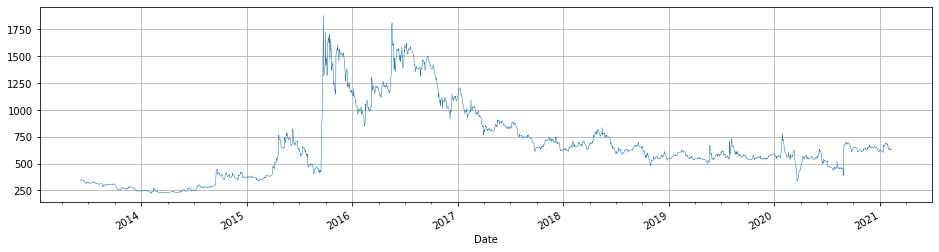

In [10]:
target_df['Adj Close'].plot()

In [11]:
target_df.iloc[-1]['Close'] * latest_stocks

151993363145.0

In [12]:
target_df.iloc[-1]['Marcap']

151993363145.0